<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries and modules

import cv2
import numpy
from matplotlib import pyplot as plt

# DEFINE THE VARIABLE imagem LIKE A NDARRAY (N-DIMENSIONAL ARRAY) FROM UPLOADING THE CONTAINED IMAGE
# IN THE FILE "Imagem_niveis_bits.jpg"

imagem = cv2.imread("Imagem_niveis_bits.jpg")

# Change the color system of the image variable to gray

imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

# Creation of a variable containing the copy of the image variable to be applied
# in the thresholding technique

imagem_cinza = imagem.copy()

# Set the technique threshold

Limite = 100

In [2]:
# Creating the loop to execute the technique

for y in range(0, imagem_cinza.shape[1]):  # Scanning of the columns
    for x in range(0, imagem_cinza.shape[0]):  # Scanning of the rows
        # Checks whether the current intensity pixel is bigger or smaller than the stablished threshold to decide
        # which change to make perform to the intensity of that pixel
        if imagem_cinza[x,y] >= Limite:
            imagem_cinza[x,y] = 255
        else:
            imagem_cinza[x, y] = 0

In [3]:
# ret STORES THE ESTABLISHED LIMIT AND Limiarizacao_func_biblioteca IS THE OUTPUT IMAGE AFTER THE THRESHOLDING BY THE opencv LIBRARY FUNCTION

ret, Limiarizacao_func_biblioteca = cv2.threshold(imagem_cinza,Limite,255,cv2.THRESH_BINARY)

In [5]:
# Print the root mean squared error between the image obtained by the implemented code and the
# image obtained by the library function

# Difference between the intensities of the pixels from the obtained image by the implemented code and the
# image obtained by the libary function

Diferenca_imagens = numpy.subtract(imagem_cinza,Limiarizacao_func_biblioteca)

Soma_elementos = numpy.sum(Diferenca_imagens) # Sum of the differences of the intensities

# Calculate the average of the sum of the differences of the intensities

Media = Soma_elementos/(imagem_cinza.shape[0]*imagem_cinza.shape[1])

Raiz = numpy.sqrt(Media) # Calculate the root

print(Raiz)

0.0


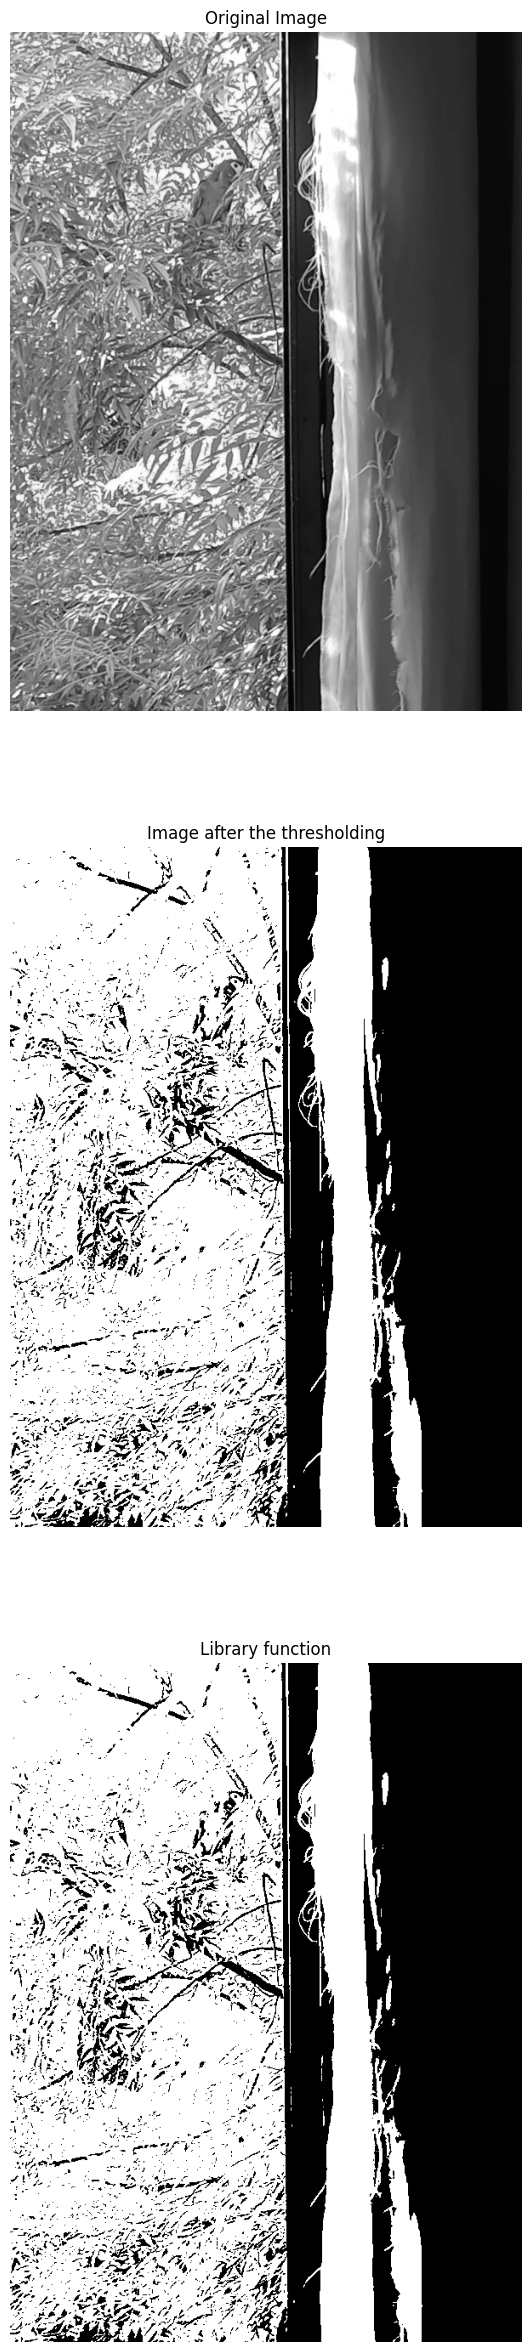

In [8]:
# SET FIGURE SIZE IN INCHES, ADJUSTING THE DISPLAYED WIDGHT AND THE HEIGHT

figura = plt.figure(figsize=(30, 30))

# DEFINING THE DISPLAY FORM, WITH THREE IMAGES, ONE ON TOP OF THE OTHER

linhas = 3
colunas = 1

# CREATING THE FIRST SUBPLOT TO BE DISPLAYED

figura.add_subplot(linhas, colunas, 1)  # SUBPLOT POSITION
# Defines the data that will be displayed as an image, and in this case, a monochrome image due to cmap='gray'
plt.imshow(imagem, cmap = 'gray')
# Desables values displayed on numerics axes
plt.axis('off')
plt.title("Original Image") # Image Title

# CREATING THE SECOND SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 2)
plt.imshow(imagem_cinza, cmap = 'gray')
plt.axis('off')
plt.title("Image after the thresholding")

# CREATING THE SECOND SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 3)
plt.imshow(Limiarizacao_func_biblioteca, cmap = 'gray')
plt.axis('off')
plt.title("Library function")

# SUBPLOTS DISPLAY

plt.show()